Cardiovascular diseases

In [1]:
%%capture
!pip install numpy pandas matplotlib seaborn scikit-learn plotly
!pip install --upgrade nbformat

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('heart.csv', index_col=None, na_values=['nan'],)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(heart.shape)
print(heart.dtypes)

(918, 12)
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
string_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
not_string_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
heart[string_col] = heart[string_col].astype('string')
heart[not_string_col] = heart[not_string_col].astype('float64')
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
# There is one record with RestingBP = 0, which is impossible. 
# We should change it to nan and then impute it later.
heart['RestingBP'] = heart['RestingBP'].replace(0, np.nan)

In [7]:
heart[heart['Cholesterol'] == 0].shape
# There are a lot of records with Cholesterol = 0, which is impossible too.
heart['Cholesterol'] = heart['Cholesterol'].replace(0, np.nan)

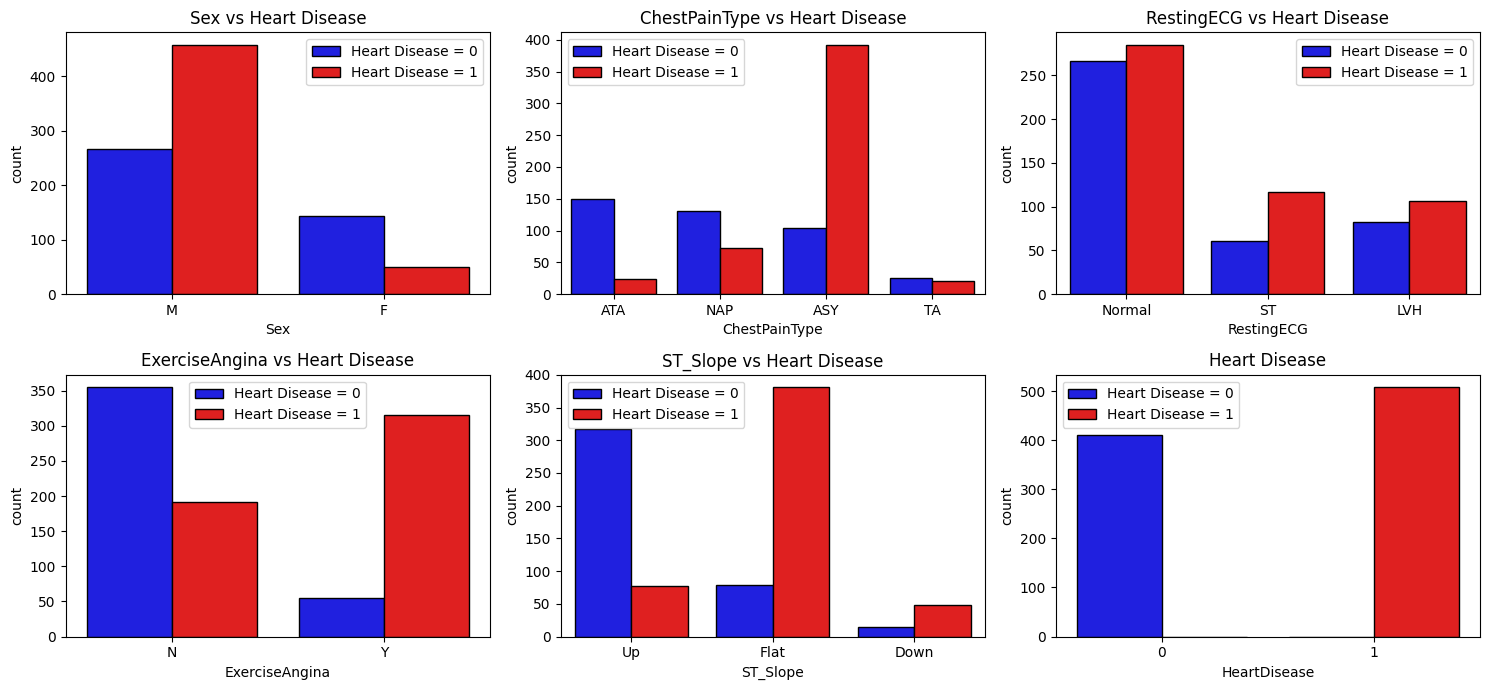

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

# For categorical variables
for i, col in enumerate(heart[string_col].columns):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{col} vs Heart Disease")
    sns.countplot(x=col, data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
    plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
    plt.tight_layout()

plt.subplot(2, 3, 6)
plt.title("Heart Disease")
sns.countplot(x='HeartDisease', data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
plt.tight_layout()

plt.show()

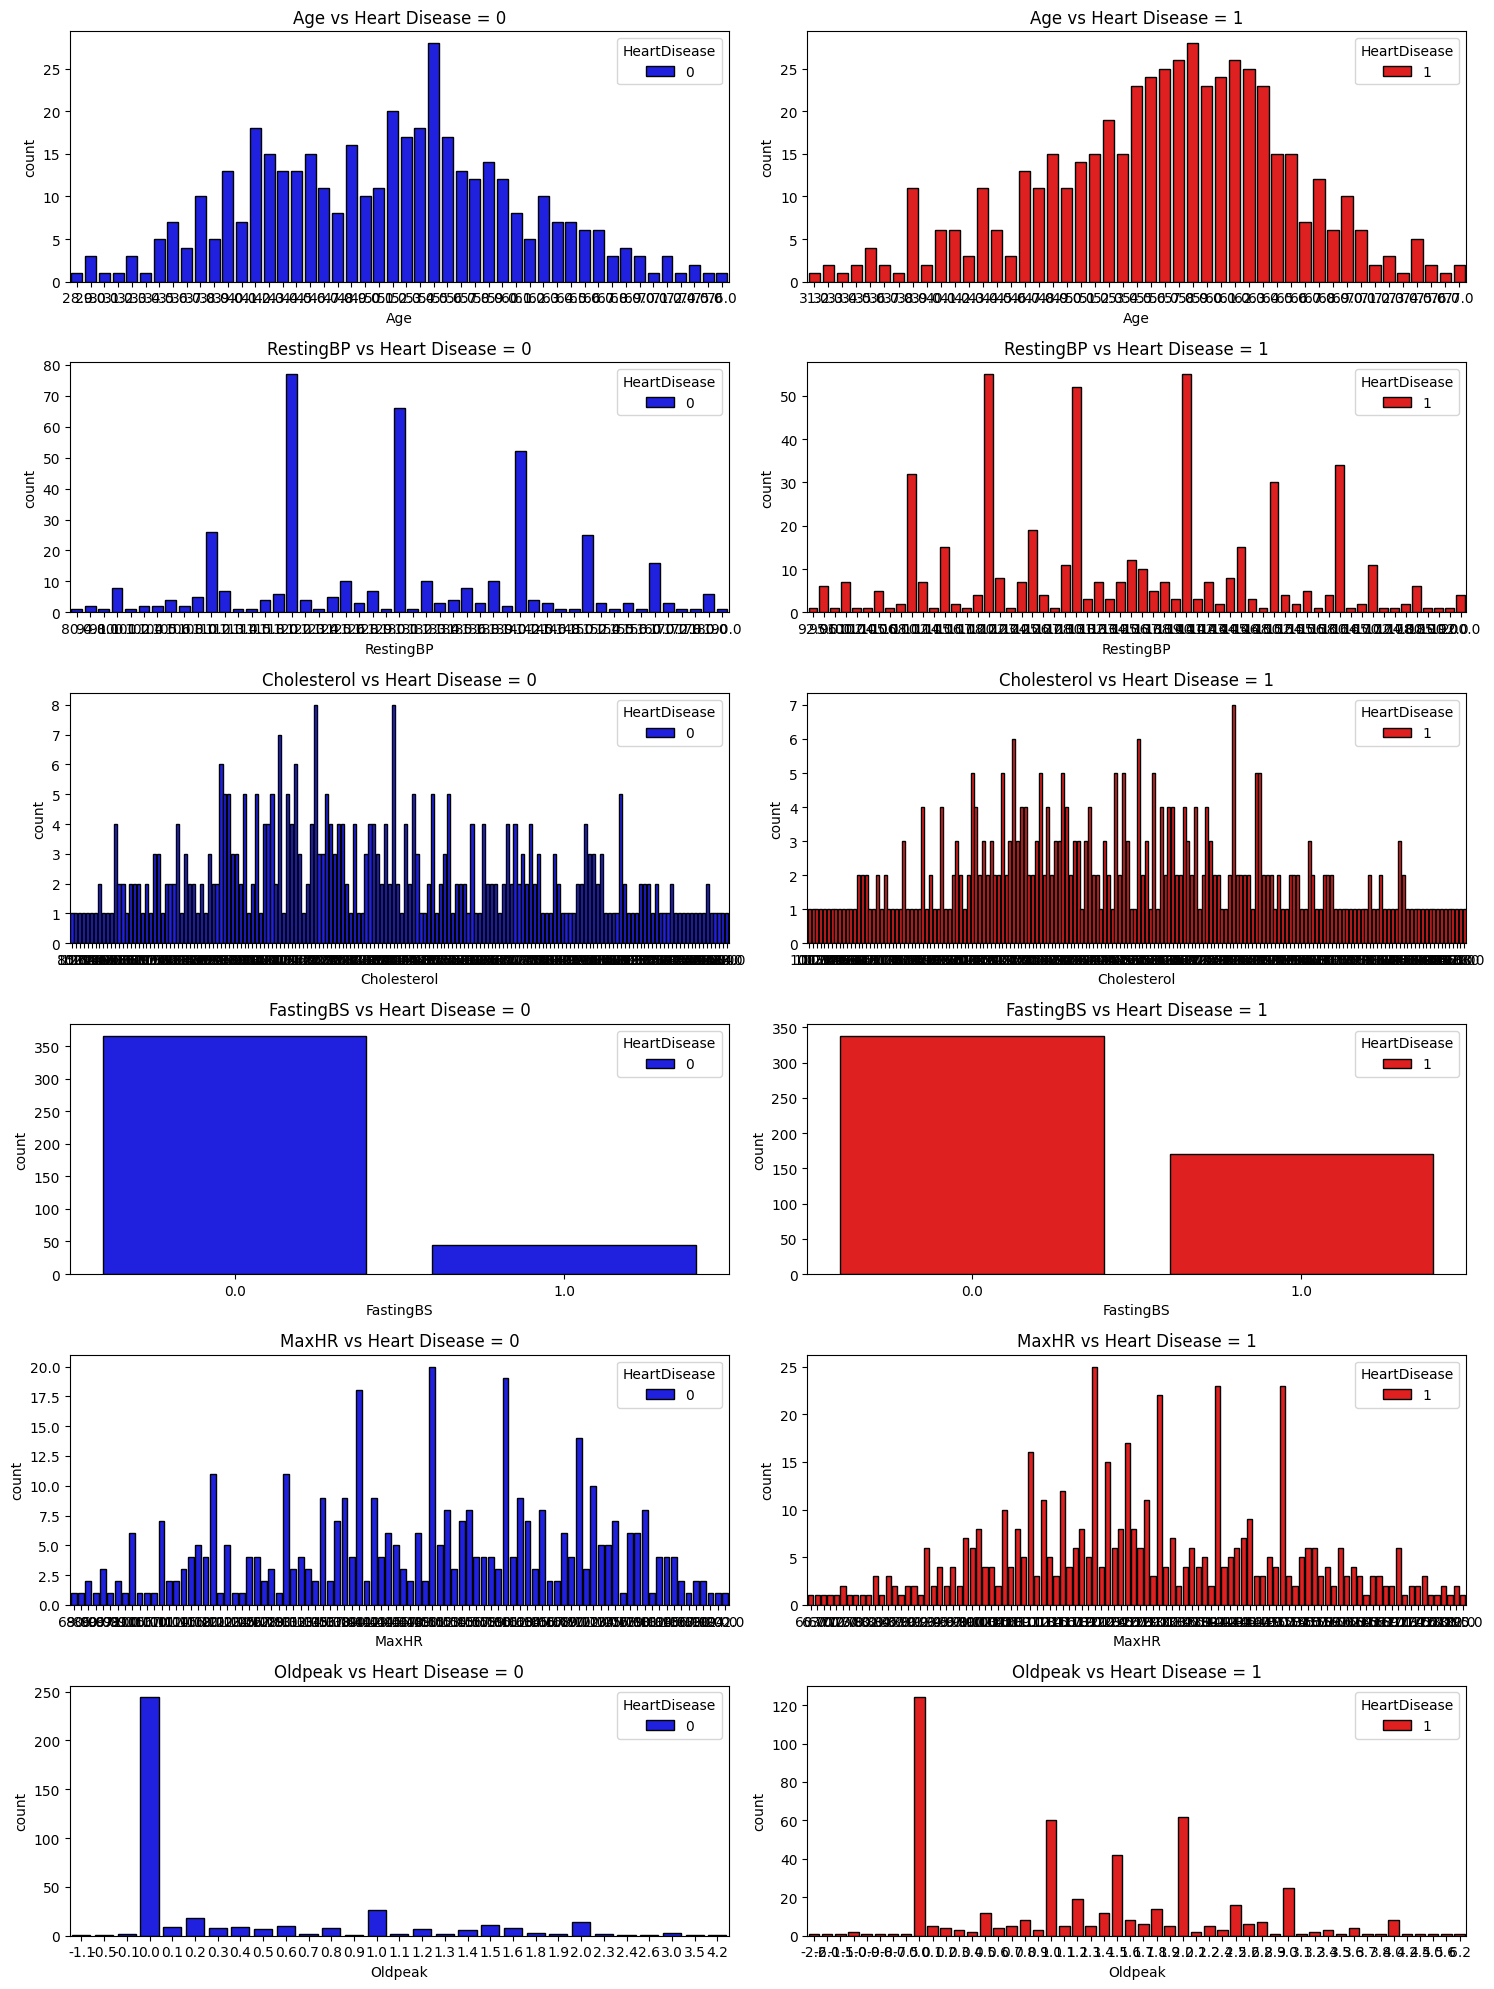

In [9]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# For numerical variables
numerical_cols = heart[not_string_col].columns
num_rows, num_cols = ax.shape

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i*2 + 1)
    plt.title(f"{col} vs Heart Disease = 0")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 0], hue="HeartDisease", palette=["blue"], edgecolor='black')
    
    plt.subplot(num_rows, num_cols, i*2 + 2)
    plt.title(f"{col} vs Heart Disease = 1")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 1], hue="HeartDisease", palette=["red"], edgecolor='black')

plt.tight_layout()
plt.show()


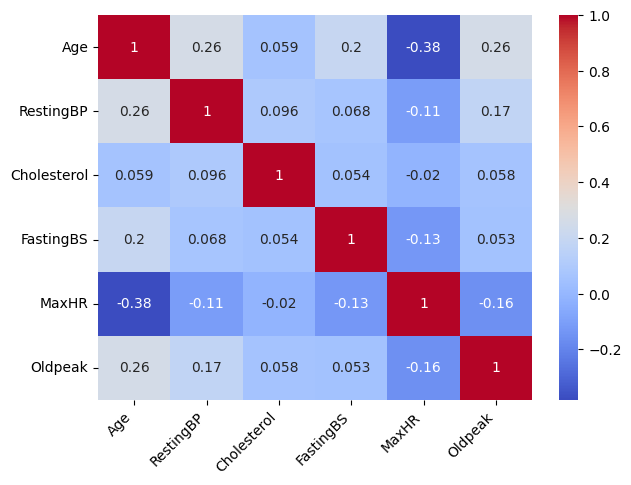

In [10]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(heart[not_string_col].corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [11]:
#unique values in each categorical column
for col in string_col:
    print(f"{col} has {heart[col].nunique()} unique values: {heart[col].unique()}")
    print("")

Sex has 2 unique values: <StringArray>
['M', 'F']
Length: 2, dtype: string

ChestPainType has 4 unique values: <StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string

RestingECG has 3 unique values: <StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string

ExerciseAngina has 2 unique values: <StringArray>
['N', 'Y']
Length: 2, dtype: string

ST_Slope has 3 unique values: <StringArray>
['Up', 'Flat', 'Down']
Length: 3, dtype: string



In [12]:
#Label Encoding for categorical columns with 2 unique values
le = preprocessing.LabelEncoder()
col_2v = ['Sex', 'ExerciseAngina']
for col in col_2v:
    heart[col] = le.fit_transform(heart[col])

In [13]:
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

In [14]:
# Scale the Age feature using MinMaxScaler
heart['Age'] = minmax_scaler.fit_transform(heart[['Age']])

# Scale the rest of the numerical features using StandardScaler
for col in not_string_col:
    if col != 'Age':
        heart[col] = standard_scaler.fit_transform(heart[[col]])

In [15]:
# One-hot encoding for categorical columns with more than 2 unique values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_name)], remainder='passthrough')
heart = np.array(ct.fit_transform(heart))

In [16]:
# KNN imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
heart = imputer.fit_transform(heart)

In [17]:
feature = heart[:, :-1]
target = heart[:, -1]

In [18]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=918*12)

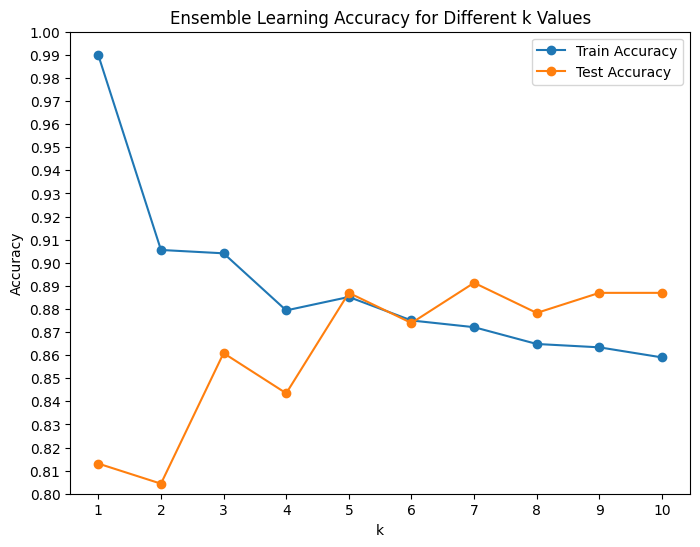

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

feature_train=np.array(feature_train)
target_train=np.array(target_train)

# Define the number of base classifiers in the ensemble
num_classifiers = 7

# Create empty lists to store the ensemble accuracies for training and test sets
ensemble_train_accuracies = []
ensemble_test_accuracies = []

k_values = [k for k in range(1, 11, 1)]

for k in k_values:
    # Create an empty list to store the base classifiers
    classifiers = []

    # Train the base classifiers on different subsets of the training data
    for i in range(num_classifiers):
        classifier = KNeighborsClassifier(n_neighbors=k)
        subset_indices = np.random.choice(len(feature_train), size=int(0.8 * len(feature_train)), replace=False)
        subset_features = feature_train[subset_indices]
        subset_targets = target_train[subset_indices]
        classifier.fit(subset_features, subset_targets)
        classifiers.append(classifier)

    # Make predictions using each base classifier and calculate their weights based on accuracy
    weights = []
    train_predictions = []
    test_predictions = []

    for classifier in classifiers:
        train_pred = classifier.predict(feature_train)
        test_pred = classifier.predict(feature_test)
        train_accuracy = accuracy_score(target_train, train_pred)
        test_accuracy = accuracy_score(target_test, test_pred)
        weight = train_accuracy / sum(train_accuracy for classifier in classifiers)
        weights.append(weight)
        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    # Combine the predictions using weighted voting for training set
    ensemble_train_predictions = np.zeros_like(train_predictions[0], dtype=np.float64)

    for i in range(len(classifiers)):
        ensemble_train_predictions += weights[i] * train_predictions[i]

    ensemble_train_predictions = np.round(ensemble_train_predictions)

    # Combine the predictions using weighted voting for test set
    ensemble_test_predictions = np.zeros_like(test_predictions[0], dtype=np.float64)

    for i in range(len(classifiers)):
        ensemble_test_predictions += weights[i] * test_predictions[i]

    ensemble_test_predictions = np.round(ensemble_test_predictions)

    # Evaluate the ensemble's accuracy for training and test sets
    ensemble_train_accuracy = accuracy_score(target_train, ensemble_train_predictions)
    ensemble_test_accuracy = accuracy_score(target_test, ensemble_test_predictions)

    ensemble_train_accuracies.append(ensemble_train_accuracy)
    ensemble_test_accuracies.append(ensemble_test_accuracy)

# Plot the ensemble accuracies for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, ensemble_train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, ensemble_test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Ensemble Learning Accuracy for Different k Values')
plt.legend()
plt.xticks(k_values)
plt.yticks(np.arange(0.8, 1.01, 0.01))  # Set y-axis ticks from 0.8 to 1 with a step of 0.01
plt.ylim(0.8, 1)
plt.show()


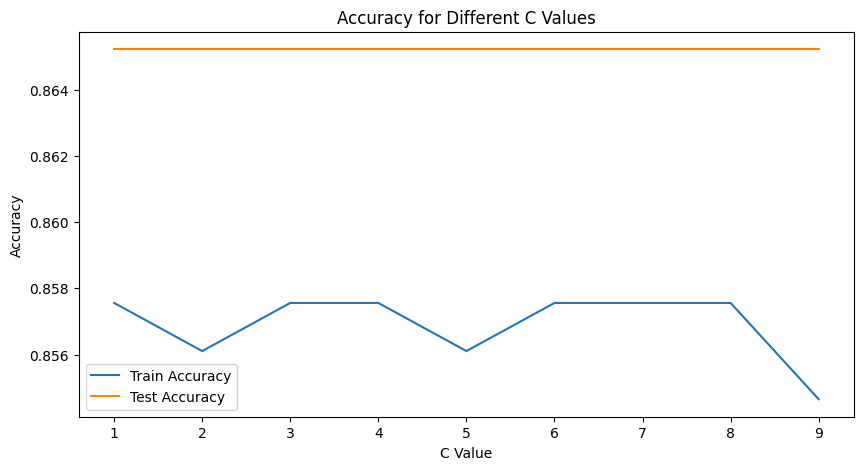

In [20]:
#using SVM model with accuracy score for different C values for both train and test set and plotting the graph
from sklearn.svm import SVC
c_range = range(1, 10, 1)
train_accuracy = []
test_accuracy = []
for c in c_range:
    svm = SVC(C=c,kernel='linear')
    svm.fit(feature_train, target_train)
    train_pred = svm.predict(feature_train)
    train_accuracy.append(accuracy_score(target_train, train_pred))
    test_pred = svm.predict(feature_test)
    test_accuracy.append(accuracy_score(target_test, test_pred))

plt.figure(figsize=(10, 5))
plt.plot(c_range, train_accuracy, label='Train Accuracy')
plt.plot(c_range, test_accuracy, label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values')
plt.legend()
plt.show()


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100),learning_rate_init=0.001, max_iter=1000, alpha=0.0001, solver= 'adam', verbose=50, random_state=21, tol=1e-4)
mlp.fit(feature_train, target_train)
mlp_pred = mlp.predict(feature_test)
print('Accuracy Score: ', accuracy_score(target_test, mlp_pred))
print('Confusion Matrix: \n', confusion_matrix(target_test, mlp_pred))
print('Classification Report: \n', classification_report(target_test, mlp_pred))

Iteration 1, loss = 0.68153395
Iteration 2, loss = 0.59269488
Iteration 3, loss = 0.52821357
Iteration 4, loss = 0.47406168
Iteration 5, loss = 0.43215919
Iteration 6, loss = 0.40103903
Iteration 7, loss = 0.38189196
Iteration 8, loss = 0.36704755
Iteration 9, loss = 0.35667129
Iteration 10, loss = 0.34819600
Iteration 11, loss = 0.34233999
Iteration 12, loss = 0.33617002
Iteration 13, loss = 0.33160031
Iteration 14, loss = 0.32534069
Iteration 15, loss = 0.31947011
Iteration 16, loss = 0.31413796
Iteration 17, loss = 0.31095441
Iteration 18, loss = 0.30681631
Iteration 19, loss = 0.30130677
Iteration 20, loss = 0.29747180
Iteration 21, loss = 0.29072824
Iteration 22, loss = 0.29100046
Iteration 23, loss = 0.28328457
Iteration 24, loss = 0.28216015
Iteration 25, loss = 0.27382010
Iteration 26, loss = 0.27051279
Iteration 27, loss = 0.26316676
Iteration 28, loss = 0.26038583
Iteration 29, loss = 0.25436928
Iteration 30, loss = 0.25174896
Iteration 31, loss = 0.24416584
Iteration 32, los